# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 26.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
100666,0.1880,0.0024,0.0024,0.0049,0.0024,0.0049,0.0049,0.0659,0.0049,0.0024,0,0,0,0
420395,0.0049,0.0024,0.0049,0.0049,0.0024,0.0049,0.0708,0.0073,0.0049,0.0269,0,0,0,0
133405,0.5420,0.5298,1.1694,0.4956,0.0610,0.0879,1.7969,1.9873,0.3711,1.4551,8,8,4,4
72998,0.4736,0.0049,0.0049,0.0049,0.0049,0.0024,0.0342,0.1416,0.0049,0.0122,7,7,9,9
217853,0.0049,0.0049,0.0049,0.0049,0.0024,0.0024,0.0049,0.0049,0.0024,0.0757,8,0,14,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463778 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          463778 non-null  float64
 1   Emg2          463778 non-null  float64
 2   Emg3          463778 non-null  float64
 3   Emg4          463778 non-null  float64
 4   Emg5          463778 non-null  float64
 5   Emg6          463778 non-null  float64
 6   Emg7          463778 non-null  float64
 7   Emg8          463778 non-null  float64
 8   Emg9          463778 non-null  float64
 9   Emg10         463778 non-null  float64
 10  repetition    463778 non-null  int64  
 11  rerepetition  463778 non-null  int64  
 12  stimulus      463778 non-null  int64  
 13  restimulus    463778 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.5 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,463778.000000,463778.00000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000
mean,0.370431,0.09488,0.171677,0.133734,0.017742,0.039629,0.337346,0.418753,0.091687,0.227919,3.200486,2.111698,5.672708,3.792519
std,0.579287,0.25710,0.487344,0.359362,0.062053,0.131240,0.602700,0.643606,0.290849,0.426220,3.487157,3.228558,6.589330,6.134340
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.029300,0.00240,0.004900,0.002400,0.002400,0.002400,0.036600,0.009800,0.002400,0.014600,0.000000,0.000000,0.000000,0.000000
50%,0.151400,0.00490,0.004900,0.004900,0.004900,0.004900,0.131800,0.117200,0.004900,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.388200,0.04880,0.063500,0.092800,0.004900,0.024400,0.349100,0.600600,0.048800,0.224600,6.000000,4.000000,10.000000,7.000000
max,4.646000,4.64360,4.641100,4.643600,1.984900,4.643600,4.643600,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193905
4      15609
12     15605
7      15602
8      15602
2      15599
11     15574
5      15570
6      15561
9      15554
10     15531
3      15530
1      15524
14     10407
17     10406
13     10402
15     10367
16     10334
18      5203
21      5202
19      5200
23      5166
20      5163
22      5162
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.686802,-0.407131,-0.395955,-0.404030,-0.272656,-0.296949,-0.584510,-0.711895,-0.33919,-0.570099
1,-0.690771,-0.407131,-0.395955,-0.410341,-0.236515,-0.279802,-0.569878,-0.711895,-0.34691,-0.575429
2,-0.690771,-0.407131,-0.391314,-0.410341,-0.236515,-0.296949,-0.547704,-0.708312,-0.33919,-0.575429
3,-0.690771,-0.398332,-0.391314,-0.410341,-0.236515,-0.296949,-0.540313,-0.704871,-0.34691,-0.570099
4,-0.686802,-0.398332,-0.395955,-0.404030,-0.272656,-0.296949,-0.544084,-0.701288,-0.34691,-0.575429
...,...,...,...,...,...,...,...,...,...,...
364899,-0.679024,-0.407131,-0.391314,-0.410341,-0.236515,-0.196120,-0.223689,-0.690823,-0.33919,-0.351550
364900,-0.671404,-0.407131,-0.395955,-0.410341,-0.236515,-0.213268,-0.245712,-0.690823,-0.33919,-0.393128
364901,-0.667435,-0.407131,-0.391314,-0.410341,-0.236515,-0.229730,-0.172100,-0.690823,-0.33919,-0.419140
364902,-0.671404,-0.407131,-0.391314,-0.410341,-0.272656,-0.246192,-0.120511,-0.690823,-0.33919,-0.445153


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
72/72 [==============================] - 4s 31ms/step - loss: 1.1911 - accuracy: 0.6819 - val_loss: 0.7908 - val_accuracy: 0.7733
Epoch 2/100
72/72 [==============================] - 2s 26ms/step - loss: 0.6958 - accuracy: 0.7981 - val_loss: 0.6074 - val_accuracy: 0.8229
Epoch 3/100
72/72 [==============================] - 2s 26ms/step - loss: 0.5834 - accuracy: 0.8283 - val_loss: 0.5266 - val_accuracy: 0.8469
Epoch 4/100
72/72 [==============================] - 2s 25ms/step - loss: 0.5173 - accuracy: 0.8469 - val_loss: 0.4795 - val_accuracy: 0.8587
Epoch 5/100
72/72 [==============================] - 2s 25ms/step - loss: 0.4762 - accuracy: 0.8589 - val_loss: 0.4431 - val_accuracy: 0.8682
Epoch 6/100
72/72 [==============================] - 2s 25ms/step - loss: 0.4426 - accuracy: 0.8672 - val_loss: 0.4200 - val_accuracy: 0.8742
Epoch 7/100
72/72 [==============================] - 2s 25ms/step - loss: 0.4206 - accuracy: 0.8737 - val_loss: 0.3950 - val_accuracy: 0.8818
Epoch 

72/72 [==============================] - 2s 26ms/step - loss: 0.1477 - accuracy: 0.9533 - val_loss: 0.1754 - val_accuracy: 0.9471
Epoch 59/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1438 - accuracy: 0.9546 - val_loss: 0.1781 - val_accuracy: 0.9464
Epoch 60/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1461 - accuracy: 0.9541 - val_loss: 0.1775 - val_accuracy: 0.9470
Epoch 61/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1457 - accuracy: 0.9542 - val_loss: 0.1749 - val_accuracy: 0.9471
Epoch 62/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1449 - accuracy: 0.9547 - val_loss: 0.1804 - val_accuracy: 0.9465
Epoch 63/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1438 - accuracy: 0.9551 - val_loss: 0.1777 - val_accuracy: 0.9477
Epoch 64/100
72/72 [==============================] - 2s 26ms/step - loss: 0.1405 - accuracy: 0.9557 - val_loss: 0.1795 - val_accuracy: 0.9463
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

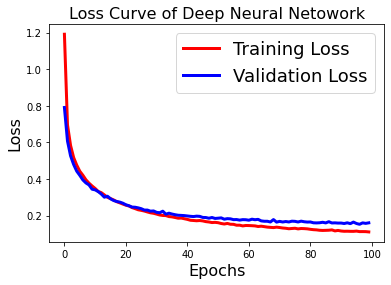

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

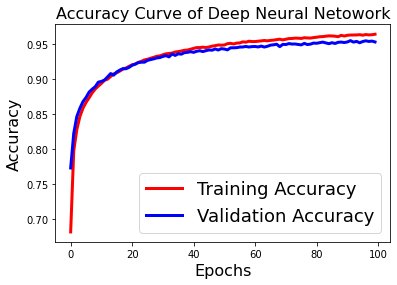

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([7, 6, 0, ..., 0, 0, 0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

5

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 95.35769583864293


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     38104
           1       0.96      0.94      0.95      2099
           2       0.96      0.96      0.96      1914
           3       0.95      0.92      0.94      2255
           4       0.97      0.95      0.96      1818
           5       0.94      0.97      0.96      1809
           6       0.97      0.93      0.95      1892
           7       0.96      0.90      0.93      1918
           8       0.96      0.88      0.92      1790
           9       0.90      0.84      0.87      2140
          10       0.97      0.75      0.84      2007
          11       0.95      0.91      0.93      1897
          12       0.92      0.92      0.92      1891
          13       0.96      0.97      0.96      1233
          14       0.92      0.89      0.91      1292
          15       0.97      0.90      0.93      1372
          16       0.97      0.97      0.97      1510
 

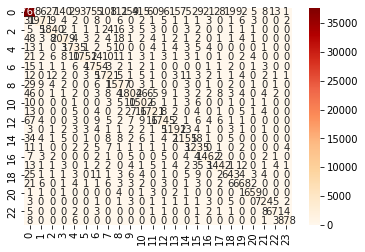

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3722201668927529
MSE: 4.210506844247133
RMSE: 2.0519519595368534


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9535820800734504
Recall Score :  0.9535769583864293
f1_score :  0.9528528833694657
